In [2]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider

In [3]:
# Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = '/content/sample_data/california_housing_train.csv'

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
# df.info(): Ini adalah perintah yang digunakan untuk menampilkan informasi tentang DataFrame 'df'.
#           Fungsi ini memberikan ringkasan singkat tentang struktur data dalam DataFrame,
#           termasuk jumlah entri, jumlah kolom, tipe data kolom, jumlah nilai yang tidak
#           null (non-null values), dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:

# Tampilkan jumlah nilai unik untuk setiap fitur
# df.nunique() adalah perintah yang digunakan untuk menghitung jumlah nilai unik (distinct values) dalam setiap kolom (fitur) DataFrame 'df'.
unique_value_counts = df.nunique()

# Cetak hasilnya
print(unique_value_counts)


longitude               827
latitude                840
housing_median_age       52
total_rooms            5533
total_bedrooms         1848
population             3683
households             1740
median_income         11175
median_house_value     3694
dtype: int64


In [6]:

# Ringkasan statistik dari dataframe
summary = df.describe()

# Tampilkan ringkasan statistik
summary


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


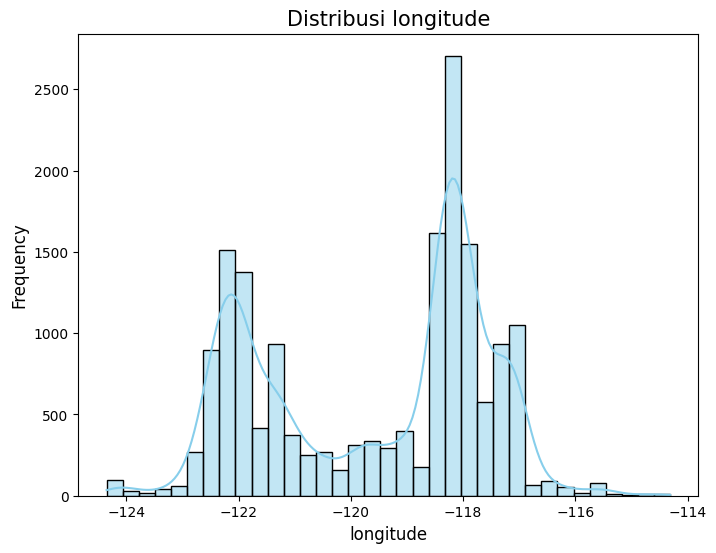

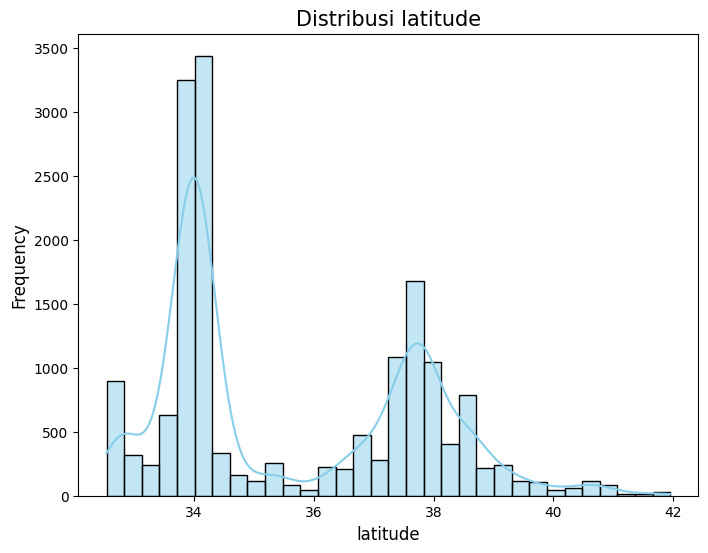

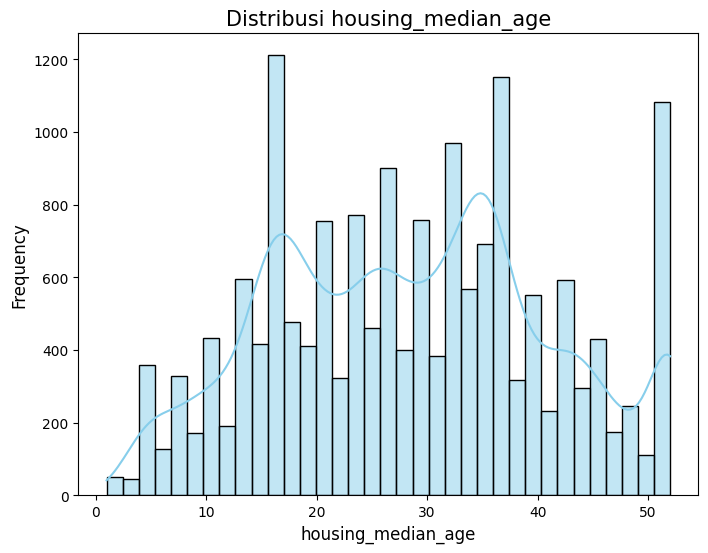

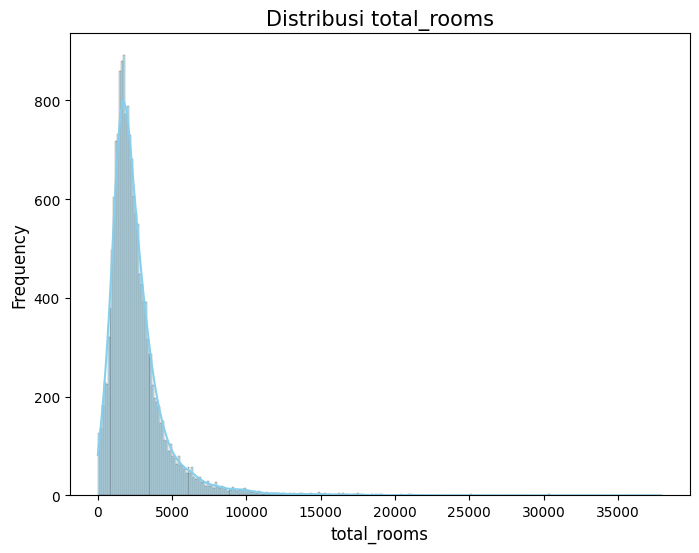

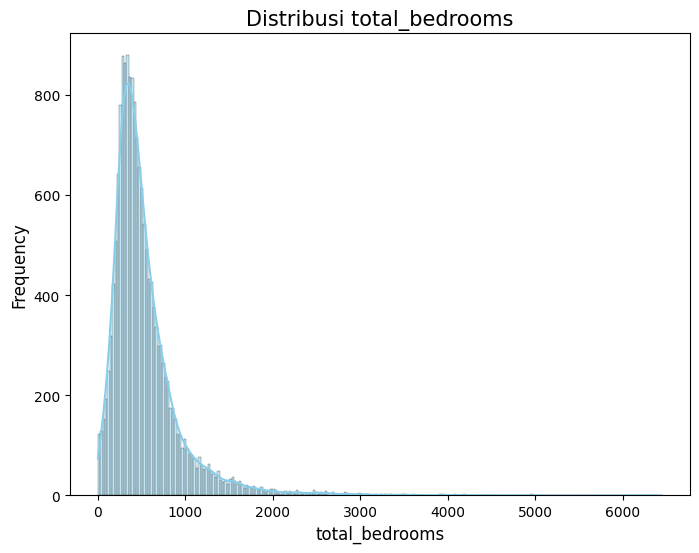

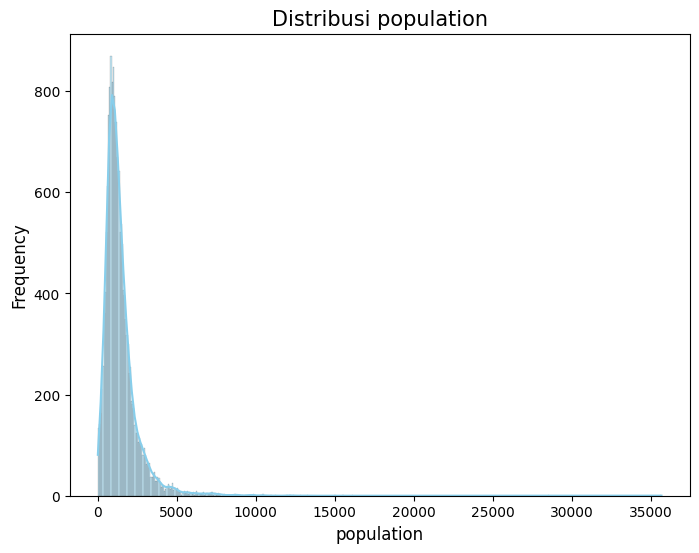

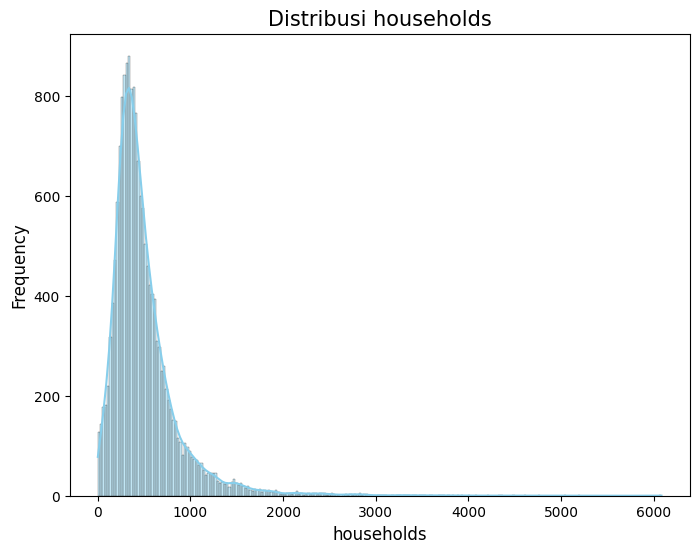

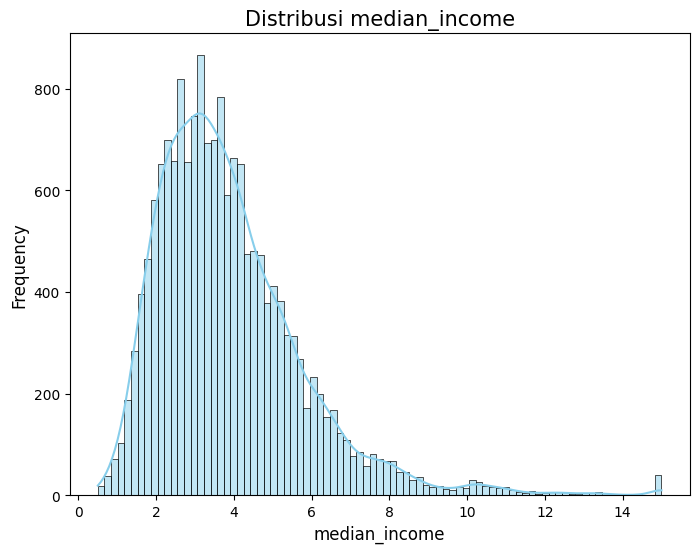

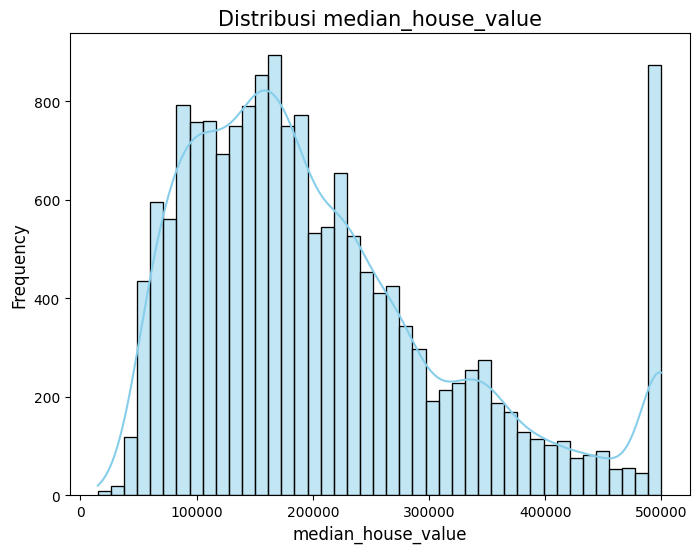

In [7]:
# Visualisasi distribusi untuk setiap fitur
for column in df.columns:
    # Memeriksa tipe data kolom, hanya melakukan visualisasi jika tipe data float64
    if df[column].dtype == 'float64':
        # Membuat sebuah gambar (plot) dengan ukuran 8x6
        plt.figure(figsize=(8, 6))
        # Menggunakan seaborn untuk membuat histogram dengan kernel density estimation (kde)
        sns.histplot(df[column], kde=True, color='skyblue')
        # Menambahkan judul plot dengan nama kolom
        plt.title(f'Distribusi {column}', size=15)
        # Menambahkan label sumbu x dengan nama kolom
        plt.xlabel(column, size=12)
        # Menambahkan label sumbu y dengan nama "Frequency"
        plt.ylabel('Frequency', size=12)
        # Menampilkan plot
        plt.show()


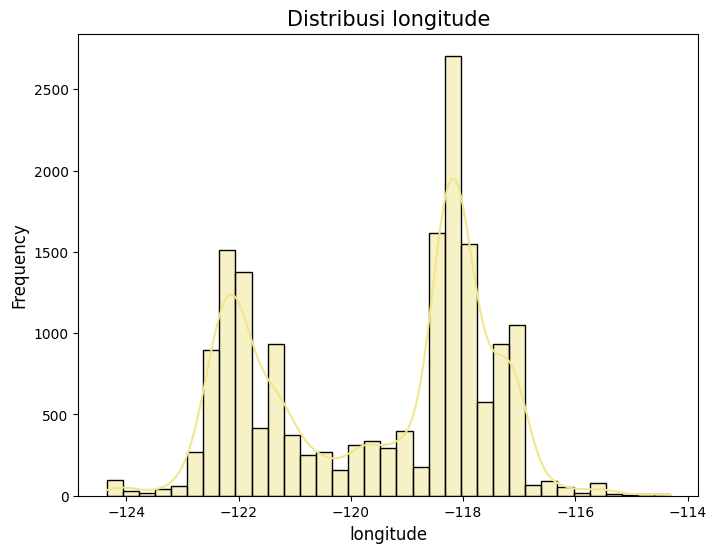

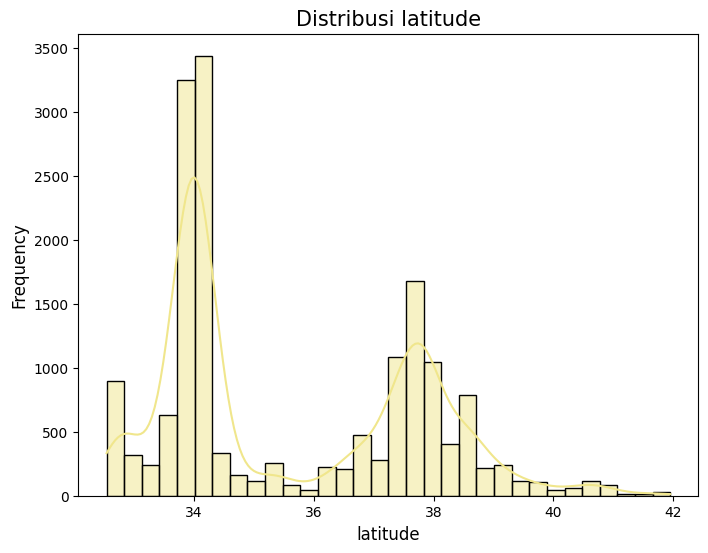

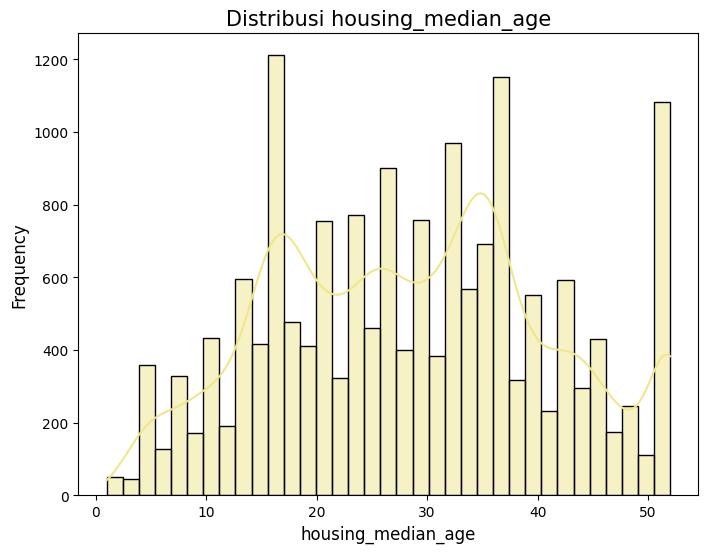

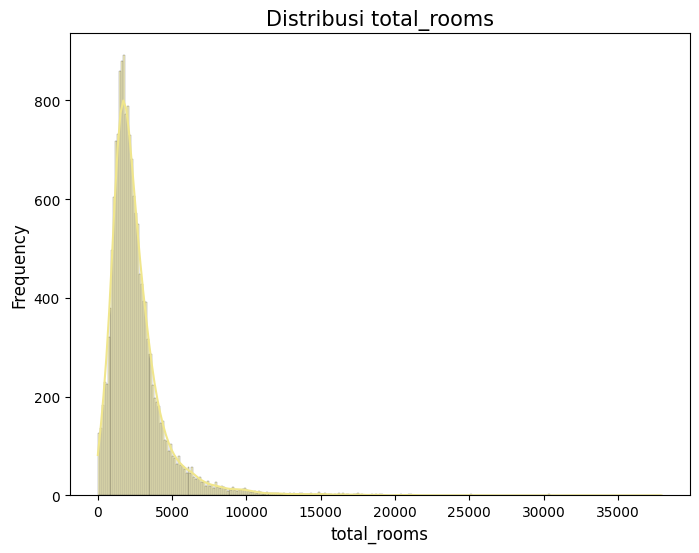

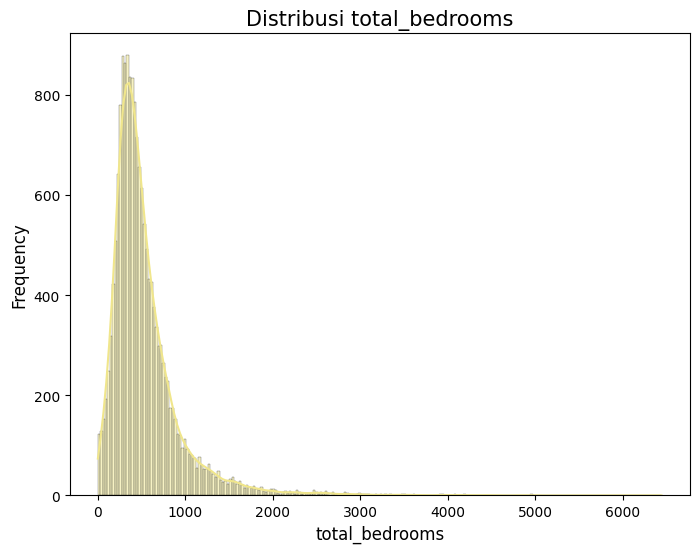

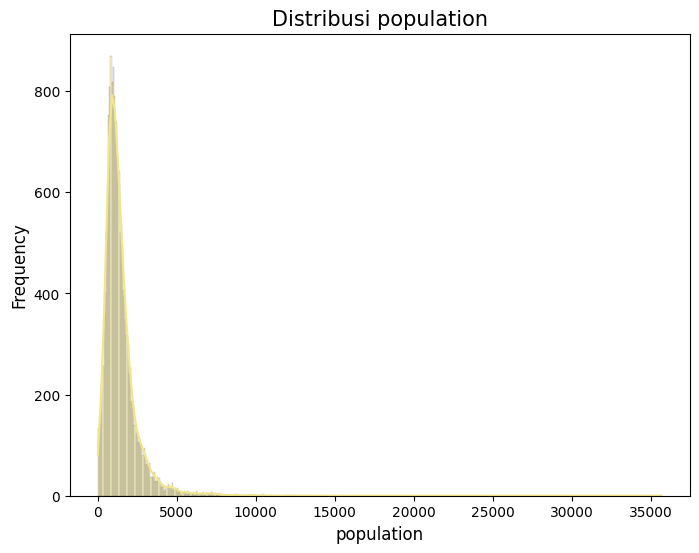

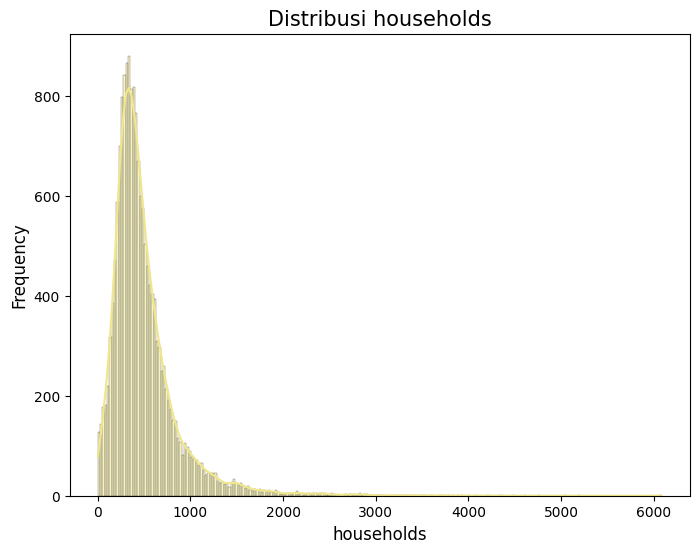

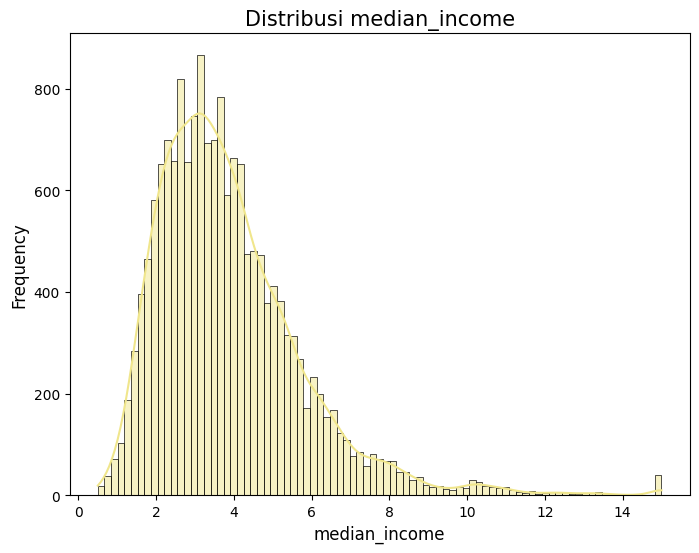

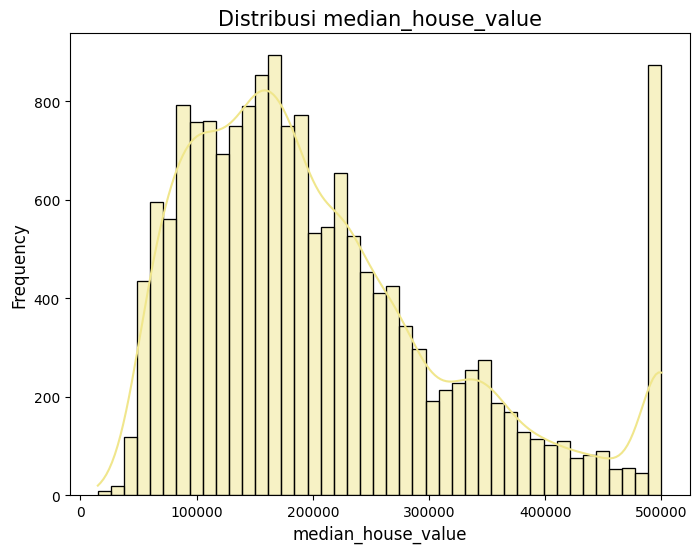

In [8]:
# Visualisasi distribusi untuk setiap fitur
for column in df.columns:
    # Memeriksa tipe data kolom, hanya melakukan visualisasi jika tipe data float64
    if df[column].dtype == 'float64':
        # Membuat sebuah gambar (plot) dengan ukuran 8x6
        plt.figure(figsize=(8, 6))
        # Menggunakan seaborn untuk membuat histogram dengan kernel density estimation (kde)
        sns.histplot(df[column], kde=True, color='khaki')  # Ubah warna menjadi khaki
        # Menambahkan judul plot dengan nama kolom
        plt.title(f'Distribusi {column}', size=15)
        # Menambahkan label sumbu x dengan nama kolom
        plt.xlabel(column, size=12)
        # Menambahkan label sumbu y dengan nama "Frequency"
        plt.ylabel('Frequency', size=12)
        # Menampilkan plot
        plt.show()

In [11]:
# Fungsi untuk memplot distribusi dengan bin width interaktif
def plot_distribution(feature, bin_width):
    # Membuat gambar baru dengan ukuran 8x6
    plt.figure(figsize=(8, 6))
    # Membuat histogram dengan seaborn (sns) dan mengatur jumlah bin sesuai dengan bin_width
    sns.histplot(df[feature], bins=bin_width, kde=True, color='khaki')
    # Menambahkan judul plot dengan nama fitur yang sedang diproses dan nilai bin_width
    plt.title(f'Distribusi {feature} (Bin Width: {bin_width})', size=15)
    # Menambahkan label sumbu x dengan nama fitur yang sedang diproses
    plt.xlabel(feature, size=12)
    # Menambahkan label sumbu y dengan nama "Frequency"
    plt.ylabel('Frequency', size=12)
    # Menampilkan plot
    plt.show()

# Interaksi untuk memilih fitur dan bin width
interact(plot_distribution, feature=df.columns, bin_width=IntSlider(min=1, max=50, step=1, value=10))

interactive(children=(Dropdown(description='feature', options=('longitude', 'latitude', 'housing_median_age', …

<function __main__.plot_distribution(feature, bin_width)>

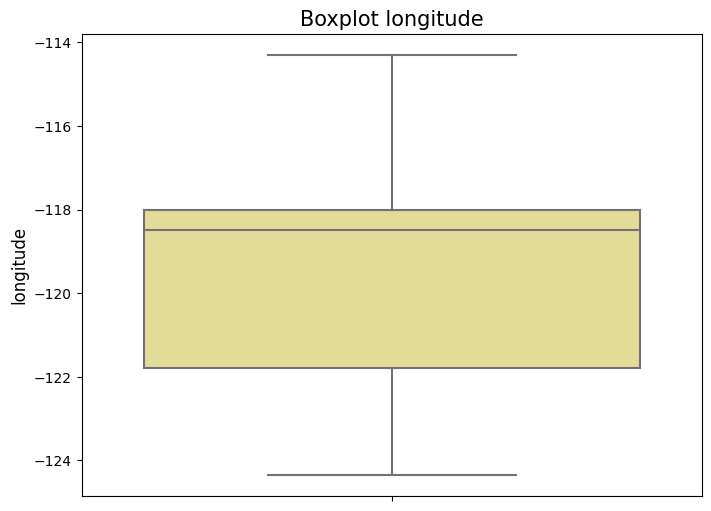

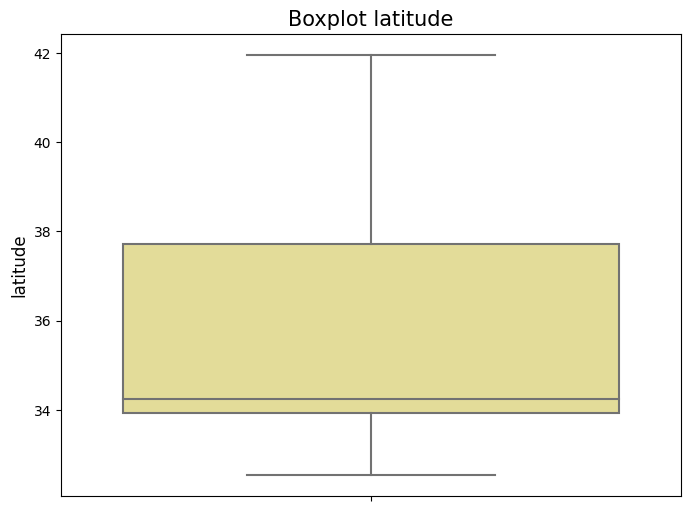

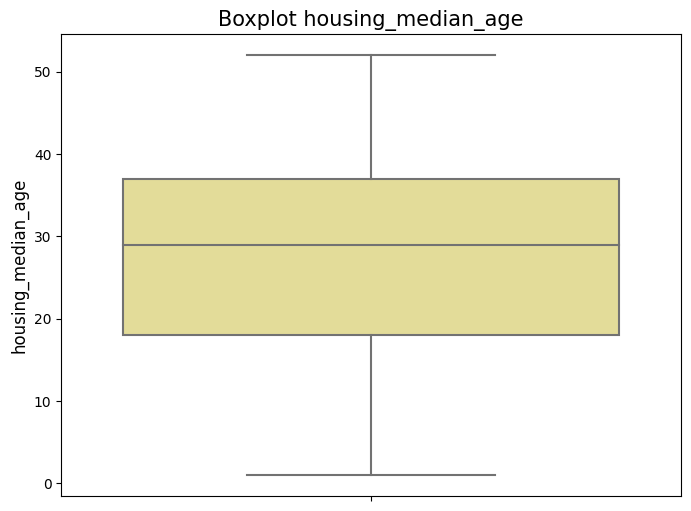

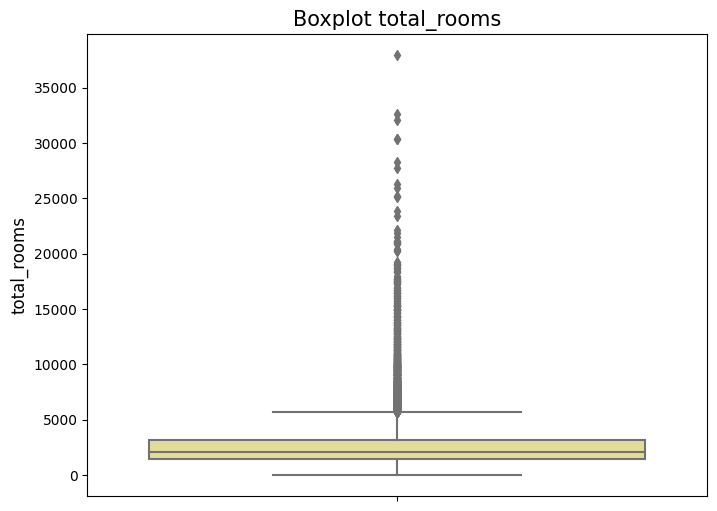

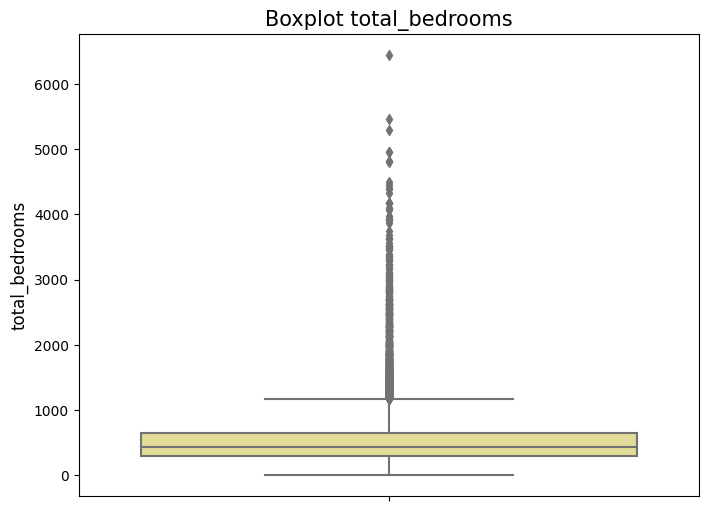

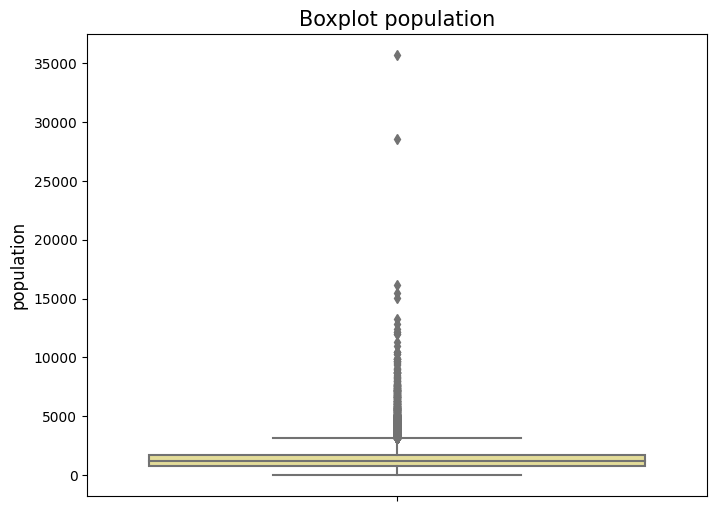

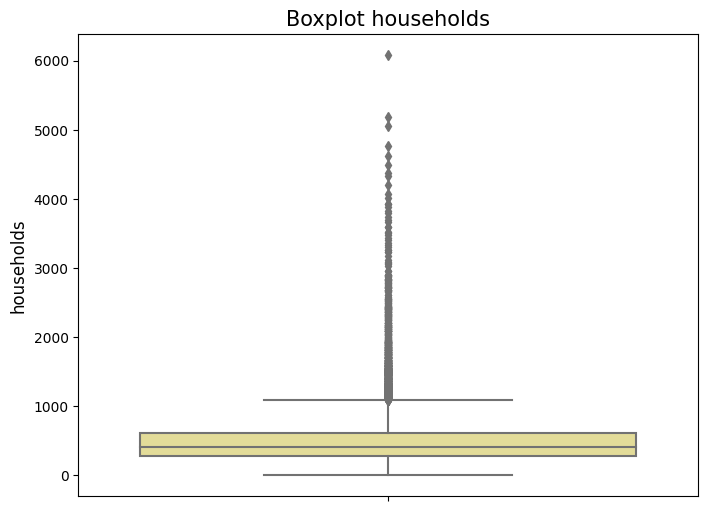

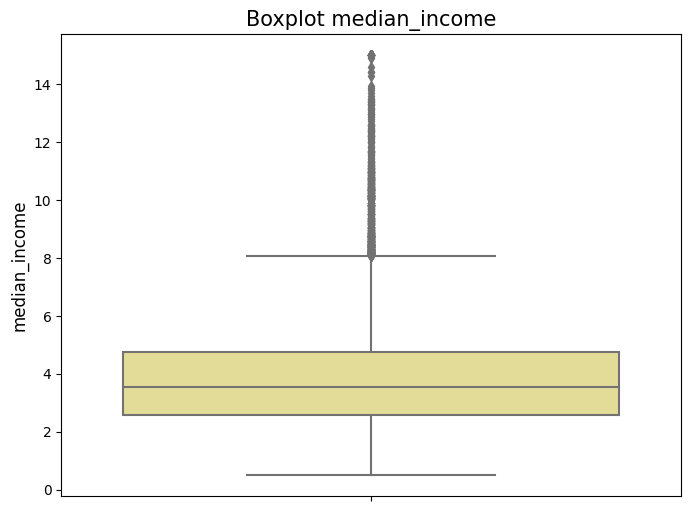

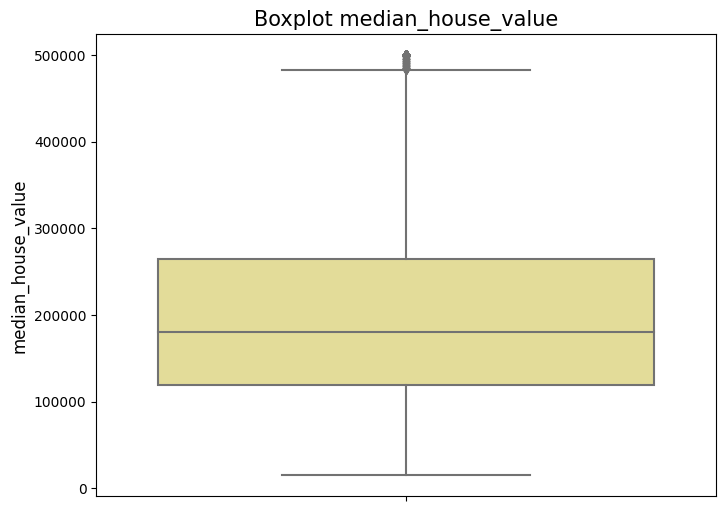

In [12]:

# Visualisasi boxplot untuk setiap fitur
for column in df.columns:
    # Memeriksa tipe data kolom saat ini, hanya memproses kolom dengan tipe data 'float64'
    if df[column].dtype == 'float64':
        # Membuat gambar baru dengan ukuran 8x6 piksel
        plt.figure(figsize=(8, 6))
        # Menggunakan seaborn (sns) untuk membuat boxplot dengan kolom saat ini
        sns.boxplot(y=df[column], color='khaki')
        # Menambahkan judul plot dengan nama kolom saat ini
        plt.title(f'Boxplot {column}', size=15)
        # Menambahkan label sumbu y dengan nama kolom saat ini
        plt.ylabel(column, size=12)
        # Menampilkan plot
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

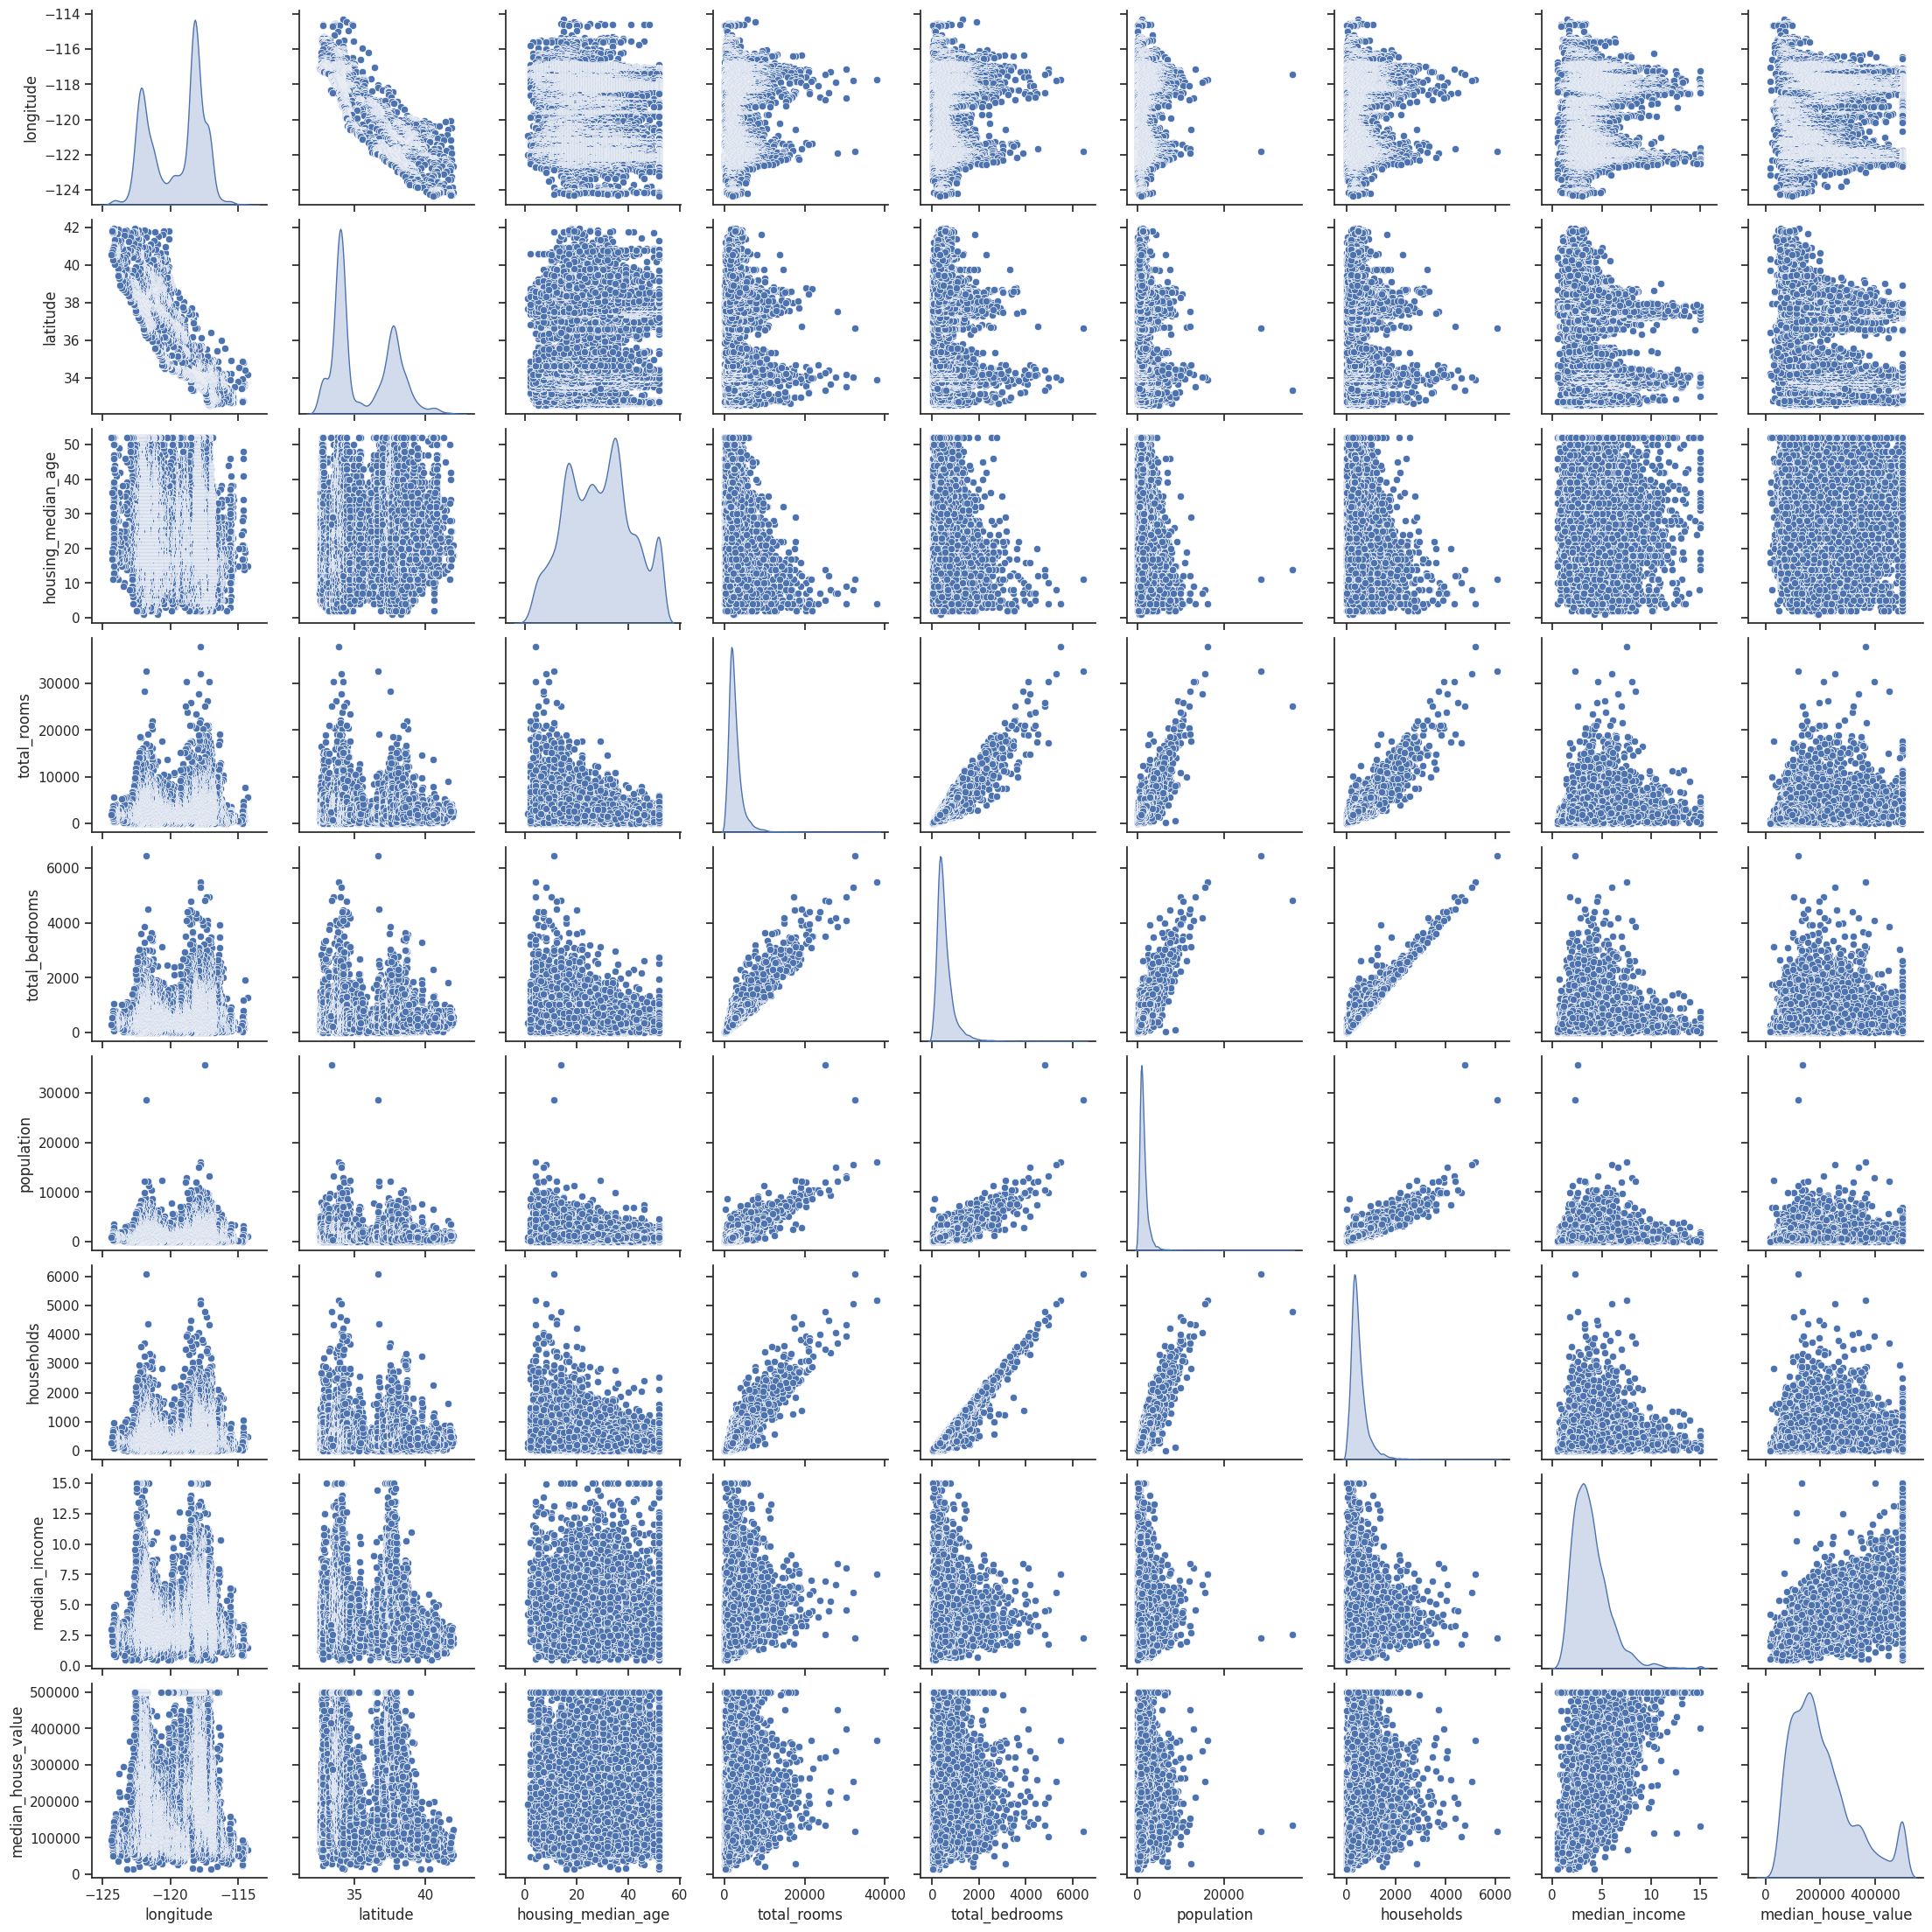

In [13]:

# Membuat scatter plot untuk setiap pasang fitur
sns.set(style="ticks")
sns.pairplot(df, kind="scatter", diag_kind="kde", palette="husl")
plt.show()